## Movie Recommendation System 📽️

#### Final Project in CCS 230 - Data Mining 🗃️

**1. About the Dataset** ✔️

The dataset used is from Movielens that contains movies, users, and ratings (3 separate .dat files).

> **Movies**
>
> **Content**
>
> The dataset is a collection of movies, each identified by a unique ID, title, release year, and genre classification. The dataset appears to serve as a catalog of films, spanning multiple genres like action, drama, comedy, thriller, sci-fi, animation, and more.
>
> **Context**
>
> Used for various analytical purposes such as exploring trends in movie genres over time, filtering movies by specific characteristics, or studying patterns in film production.

> **Users**
>
> **Content**
>
> Includes user-related information. Each row appears to represent a different user and includes attributes such as: User ID, Gender, Age, user preferences, location, ZIP code, etc.
>
> **Context**
>
> Useful for analyzing user demographics, studying audience preferences, or understanding patterns in user behavior.

> **Ratings**
>
> **Content**
>
> Consists of user ratings for different movies. Each row in the dataset typically includes: **user ID**, **movie ID**, **rating score**, and **timestamp**.
>
>
> **Context**
>
> Practical in analyzing user preferences and movie popularity. This dataset could be used for building recommendation systems, identifying trends in movie ratings over time, and understanding how different demographics respond to various genres.

In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import dates as mdates

In [3]:
# import dataset
movies = pd.read_csv('movies.dat', sep='::', engine='python',
                         names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python',
                          names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')
users = pd.read_csv('users.dat', sep='::', engine='python',
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='latin-1')


In [4]:
print(f"shape: {movies.shape}")
movies.head()

shape: (3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(f"shape: {users.shape}")
users.head()

shape: (6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
print(f"shape: {ratings.shape}")
ratings.head()

shape: (1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


`📂movies.dat`

**Shape: (3833,3)**

This dataset contains information about **3,883 unique movies**, with each row representing one movie.

- MovieID: A unique identifier for each movie.
- Title: The movie’s title, often including the release year.
- Genres: A pipe-separated string listing the genres associated with the movie.

Example:

Toy Story (1995) belongs to the genres: Animation, Children's, and Comedy.

`📂users.dat`

**Shape: (6040,5)**

This dataset contains information about **6,040 unique movies**, with each row representing one movie.

- UserID: A unique identifier for each user.
- Gender: The user's gender (`M` or `F`).
- Age: An age group code (e.g., 1 might mean "under 18").
- Occupation: An integer code representing the user's occupation.
- Zip-code: The user's ZIP or postal code.

Example:

User 1 is a female, age group 1, with occupation code 10, and ZIP code 48067.

`📂ratings.dat`

**Shape: (1,000,209, 4 )**

This dataset contains information about **1 million movie ratings**, with each row representing one movie.

- UserID: Identifies which user gave the rating.
- MovieID: Identifies which movie was rated.
- Rating: A value from 1 to 5 indicating the user’s rating.
- Timestamp: When the rating was made, as a UNIX timestamp.

Example:

User 1 gave movie ID 1193 a rating of 5 at time 978300760.

**2. Overview of Dataset** ✔️

In [7]:
df1 = pd.DataFrame(movies)
df1

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
# Get all unique genres
all_genres = set('|'.join(movies['Genres']).split('|'))
print(sorted(all_genres))

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [8]:
df2 = pd.DataFrame(users)
df2

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [9]:
df3 = pd.DataFrame(ratings)
df3

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


**3. Preparing Dataset** ✔️

In [13]:
# Check missing value
df1.isnull().sum().to_frame('NaN value').T

,MovieID,Title,Genres
NaN value,0,0,0


In [14]:
df2.isnull().sum().to_frame('NaN value').T

,UserID,Gender,Age,Occupation,Zip-code
NaN value,0,0,0,0,0


In [15]:
df3.isnull().sum().to_frame('NaN value').T

,UserID,MovieID,Rating,Timestamp
NaN value,0,0,0,0


In [16]:
# check count of unique values in each columns
for col in df1:
    print(f"{col}: {df1[col].nunique()}")

MovieID: 3883
Title: 3883
Genres: 301


In [17]:
for col in df2:
    print(f"{col}: {df2[col].nunique()}")

UserID: 6040
Gender: 2
Age: 7
Occupation: 21
Zip-code: 3439


In [18]:
for col in df3:
    print(f"{col}: {df3[col].nunique()}")

UserID: 6040


MovieID: 3706
Rating: 5
Timestamp: 458455


In [19]:
# more details
df1.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MovieID,3883.0,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0


In [20]:
df2.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
UserID,6040.0,3020.500000,1743.742145,1.0,1510.75,3020.5,4530.25,6040.0
Age,6040.0,30.639238,12.895962,1.0,25.00,25.0,35.00,56.0
Occupation,6040.0,8.146854,6.329511,0.0,3.00,7.0,14.00,20.0


In [21]:
df3.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


In [22]:
df1.describe(include=[object]).T

,count,unique,top,freq
Title,3883,3883,Toy Story (1995),1
Genres,3883,301,Drama,843


In [23]:
df2.describe(include=[object]).T

,count,unique,top,freq
Gender,6040,2,M,4331
Zip-code,6040,3439,48104,19


In [24]:
movies.drop('MovieID', axis=1, inplace=True)

In [25]:
ratings.drop(['UserID'], axis=1, inplace=True)

In [26]:
users.drop('UserID', axis=1, inplace=True)

These codes remove the `MovieID` column from the `movies` DataFrame, and the `UserID` column from both the `ratings` and `users` DataFrames. The `axis=1` argument specifies that a column (not a row) is being dropped. Setting `inplace=True` means the original DataFrames are modified directly. This is typically done to clean up the data after merging datasets, especially when ID columns are no longer needed for analysis. Removing unnecessary columns helps simplify the dataset and focus on more relevant features.

In [27]:
# gender encoding
users['Gender'] = users['Gender'].replace(['Male', 'Female'], [0, 1])

# occupation encoding
users['Occupation'] = users['Occupation'].astype('category').cat.codes

In [28]:
# extract year from title if present
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)').astype(float)

# split genres into dummy variables
genres_split = movies['Genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genres_split], axis=1)

This convert categorical and textual data into numerical formats for analysis. Gender and occupation are encoded numerically, the movie release year is extracted from titles, and genres are split into separate binary columns. This makes the dataset cleaner and ready for modeling or visualization.

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [32]:
df1.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [33]:
df2.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [34]:
df3.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

**4. Exploratory Data Analysis (EDA)**

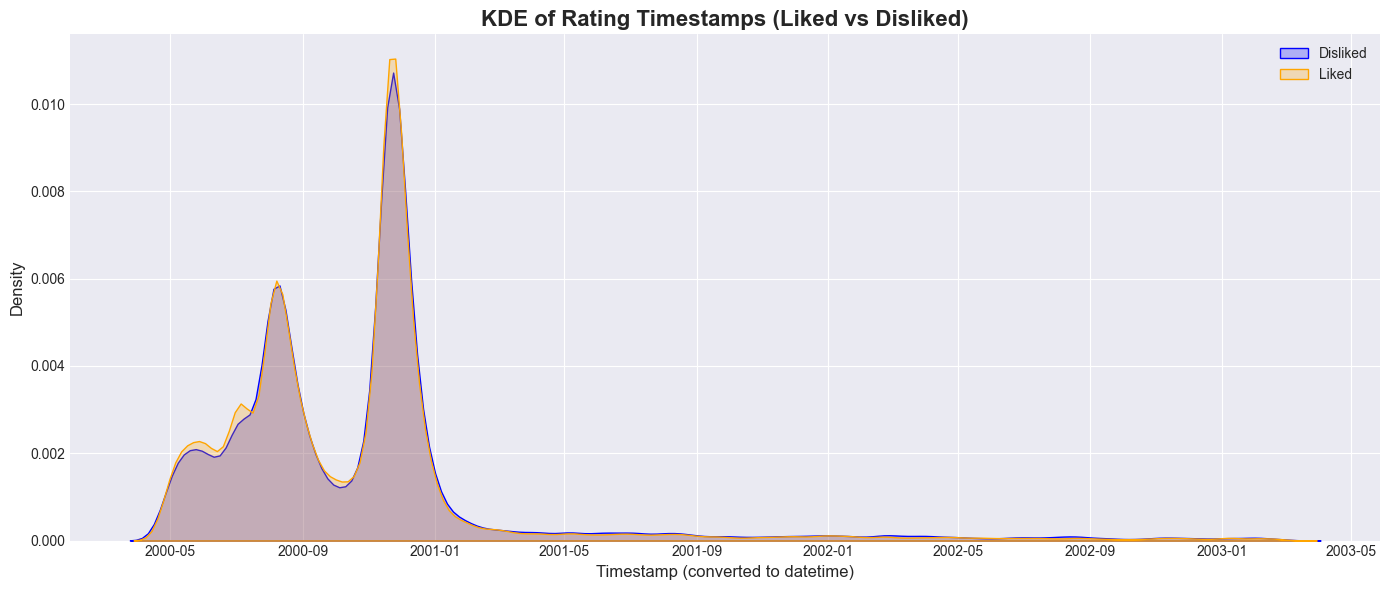

In [35]:
# Convert timestamp and create 'Liked' column
ratings['Datetime'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Liked'] = ratings['Rating'] >= 4

# Set style and figure size
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 6))  # make the plot wider

# KDE plots with distinct colors
sns.kdeplot(
    ratings.loc[ratings['Liked'] == False, 'Datetime'],
    label='Disliked',
    shade=True,
    color='blue'
)
sns.kdeplot(
    ratings.loc[ratings['Liked'] == True, 'Datetime'],
    label='Liked',
    shade=True,
    color='orange'
)

# Title and labels
plt.title('KDE of Rating Timestamps (Liked vs Disliked)', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp (converted to datetime)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

This graph is a **Kernel Density Estimate (KDE)** plot that visualizes the distribution of rating timestamps for two categories: **Liked** (ratings ≥ 4) and **Disliked** (ratings < 4).

1. Data Preparation

- The `Timestamp` column in the `ratings` dataset is converted to datetime format using `pd.to_datetime()`, so that each rating has an actual time representation.
- A new column `Liked` is created, where ratings of **4 or higher** are marked as `True` (Liked), while ratings below 4 are `False` (Disliked).

2. KDE Plot Explanation
- The KDE plot estimates the probability density of rating timestamps, showing when ratings were given over time.
- Two separate density curves are plotted:
    - Disliked Ratings (Blue) – Representing ratings below 4.
    - Liked Ratings (Orange) – Representing ratings of 4 or higher.

3. Observations from the Graph
- The density distribution suggests that user activity in rating movies was **not uniform over time**, with certain peak periods of rating activity.
- There are **two major peaks**, indicating time periods where both liked and disliked ratings were more frequent.
- The **liked ratings (orange)** appear to be slightly more frequent compared to disliked ratings in certain time ranges, suggesting more positive ratings were given at peak periods.
- The KDE smooths out the density of timestamps to visualize trends rather than just raw counts.
- The similarity in shapes between liked and disliked ratings suggests that users rate movies in a consistent pattern over time, rather than fluctuating dramatically.



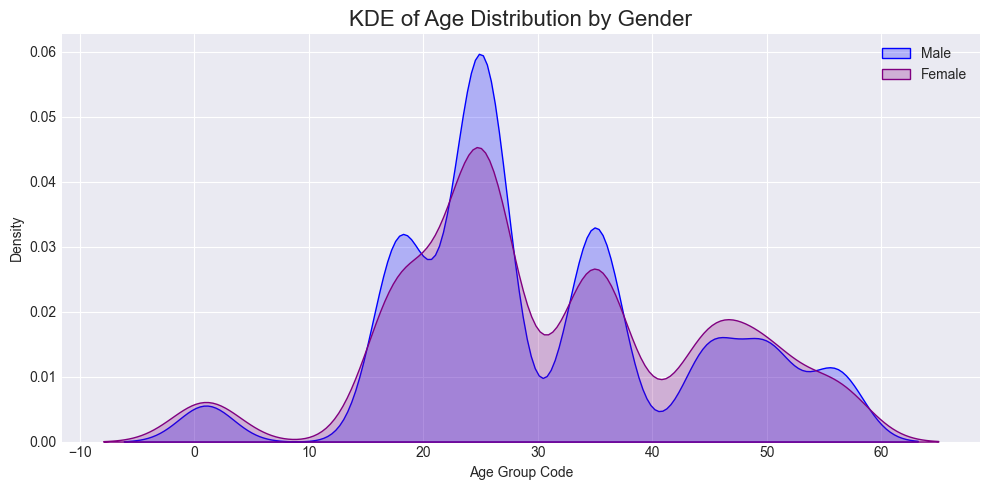

In [36]:
plt.figure(figsize=(10, 5))
sns.kdeplot(users.loc[users['Gender'] == 'M', 'Age'], label='Male', shade=True, color='blue')
sns.kdeplot(users.loc[users['Gender'] == 'F', 'Age'], label='Female', shade=True, color='purple')

plt.title('KDE of Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Group Code')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Meanwhile, this graph is a **Kernel Density Estimate (KDE)** plot displaying the age distribution for males and females from the users dataset.

1. Data Representation
- The **x-axis** represents age group codes, which categorize users into different age ranges.
- The **y-axis** represents density, showing the distribution of users within these age groups.
- The KDE plot smooths out the data to estimate the probability density of ages.

2. Curve Explanation
- **Blue Curve (Male Users)**: Represents the age distribution for male users.
- **Purple Curve (Female Users)**: Represents the age distribution for female users.
- The shaded areas indicate where most users fall within certain age groups.

3. Observations from the Graph
- The **highest density peak** is around age group code **20**, meaning that the majority of users fall within this category.
- The distribution for male users appears slightly broader, while female users have a slightly lower density overall but follow a similar shape.
- Smaller peaks at other age group codes suggest that there are secondary concentrations of users in older age ranges.
- The KDE smooths the histogram-like distribution to provide a clearer representation of variations across ages.

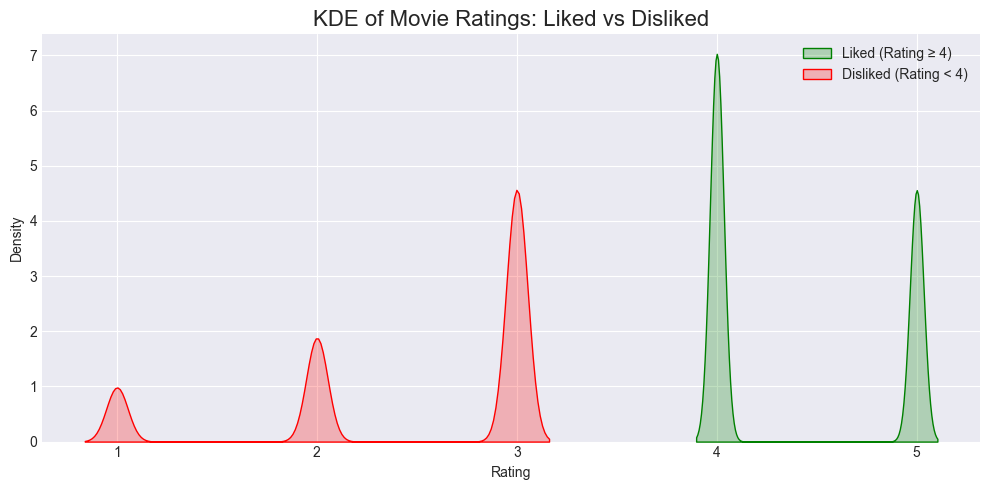

In [37]:
# Define "Liked" as ratings >= 4
ratings['Liked'] = ratings['Rating'] >= 4

plt.figure(figsize=(10, 5))
sns.kdeplot(ratings.loc[ratings['Liked'] == True, 'Rating'], label='Liked (Rating ≥ 4)', shade=True, color='green')
sns.kdeplot(ratings.loc[ratings['Liked'] == False, 'Rating'], label='Disliked (Rating < 4)', shade=True, color='red')

plt.title('KDE of Movie Ratings: Liked vs Disliked', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.tight_layout()
plt.show()

Lastly, the KDE for visualizing the distribution of movie ratings, distinguishing between **Liked** (ratings ≥ 4) and **Disliked** (ratings < 4)

1. KDE Plot Explanation
- **X-Axis**: Represents movie ratings, which range from 1 to 5.
- **Y-Axis**: Shows the density, meaning how frequently ratings occur at each value.
- **Green Curve**: Represents **Liked** ratings (≥ 4).
- **Red Curve**: Represents **Disliked** ratings (< 4).
- The shaded areas highlight the density of ratings, making it easier to see which rating values are more common.

2. Observations from the Graph
- The **green curve (Liked ratings) peaks** around ratings of 4 and 5, meaning most users gave higher ratings to movies they liked.
- The **red curve (Disliked ratings) has peaks at lower rating values**, mostly around 1 to 3.
- The overlap between the two distributions suggests that users didn’t exclusively rate movies at extreme values (purely 1 or 5); some movies received mixed responses.
- The higher density of Liked ratings near 4 and 5 suggests that users tend to rate movies positively.

**4.1 Univariate Analysis** ✔️

In [38]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MovieID,3883.0,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0


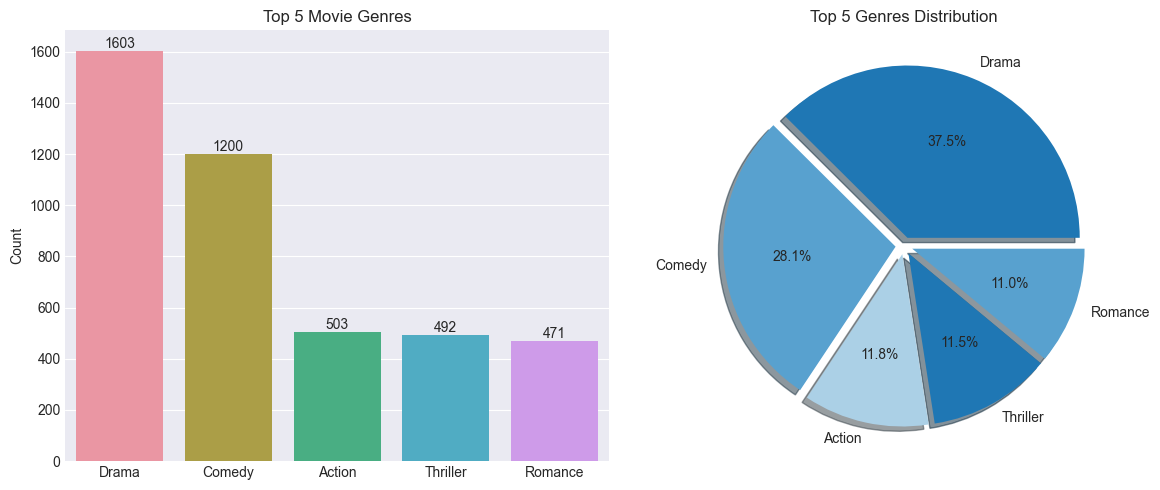

In [39]:
# Extract genres (split by '|') into a flat list
genre_counts = movies['Genres'].str.split('|').explode().value_counts().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# CountPlot (Bar)
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[0])
axes[0].set_title('Top 5 Movie Genres')
axes[0].set_ylabel('Count')
axes[0].bar_label(axes[0].containers[0])

# Pie chart
axes[1].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.05]*5)
axes[1].set_title('Top 5 Genres Distribution')

plt.tight_layout()
plt.show()

This visualization uses two complementary plots—a bar chart and a pie chart to show the distribution of the most frequent movie genres in `movies` dataset.

1. Data Preparation
- **Genre Extraction**: The code takes first the `Genres` column olumn (which contains one or more genres per movie separated by a vertical bar `"|"`) and splits it into individual genre items using the `str.split('|')` method. The `.explode()` function then “flattens” these lists so that each genre gets its own row.
- **Counting Genres**: Next, the code counts the frequency of each genre with `.value_counts()` and then selects the five most common genres using `.nlargest(5)`. The resulting `genre_counts` series has genre names as its index and their corresponding counts as values.

2. Visualization

- **Bar Plot**
    - The bar plot displays the top five movie genres on the x-axis and their absolute counts on the y-axis. Each bar represents one genre, and the height of the bar indicates how many movies belong to that genre.
    - This plot gives a straightforward look at which genres appear most frequently in the dataset.

- **Pie Chart**
    - The pie chart represents the same top 5 genres as portions of a whole. Each slice’s size corresponds to the percentage that genre represents within the top five.
    - This chart quickly communicates the relative proportions of the top genres in the movies collection.

- By looking at these two plots together, we gain both an absolute count (via the bar chart) and a relative share (via the pie chart) of the most popular genres. For example, if **Comedy** is the tallest bar in the bar plot, we also see its large percentage in the pie chart—emphasizing that when you consider movies with the top genres, **Comedy** is dominant.


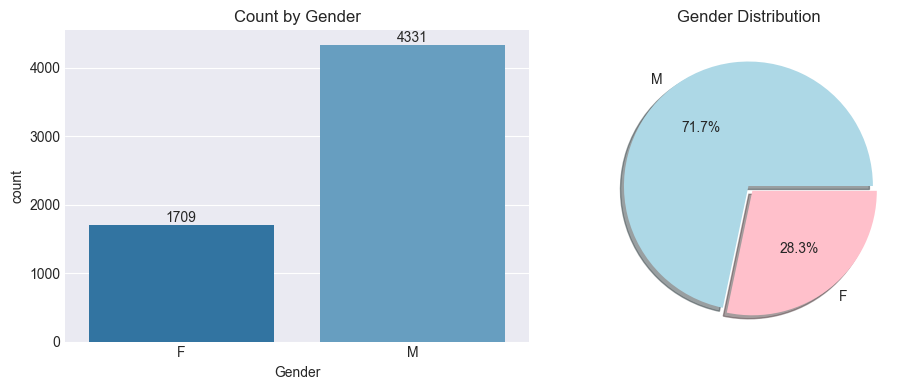

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# CountPlot
sns.countplot(data=users, x='Gender', ax=axes[0])
axes[0].set_title('Count by Gender')
axes[0].bar_label(axes[0].containers[0])

# Pie Chart
gender_counts = users['Gender'].value_counts()
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, colors=['lightblue','pink'], explode=[0,0.05])
axes[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

1. Visualization

- **Bar Plot** 
    - The left subplot is titled **"Count by Gender"**. The bars are automatically labeled with their numerical counts using `bar_label()`, so you can quickly see how many users are in each group.
    - This plot provides a clear picture of the absolute number of users in each gender category, which is useful for understanding the demographic makeup at a glance.

- **Pie Chart**
    - The pie chart is titled "Gender Distribution". It displays percentage labels on each slice (formatted to one decimal place via autopct='%1.1f%%'), adds a shadow for depth, uses distinct colors (lightblue for one group, pink for the other), and slightly "explodes" one slice (0.05 offset) to emphasize that segment.
    - With this chart, we can quickly see the relative contributions of each gender to the entire user population. This complementary view is ideal for understanding proportions rather than raw counts.

Both charts display the gender distribution: the count plot provides exact numbers, while the pie chart shows the relative percentages. Together, they offer a comprehensive view of this demographic feature.


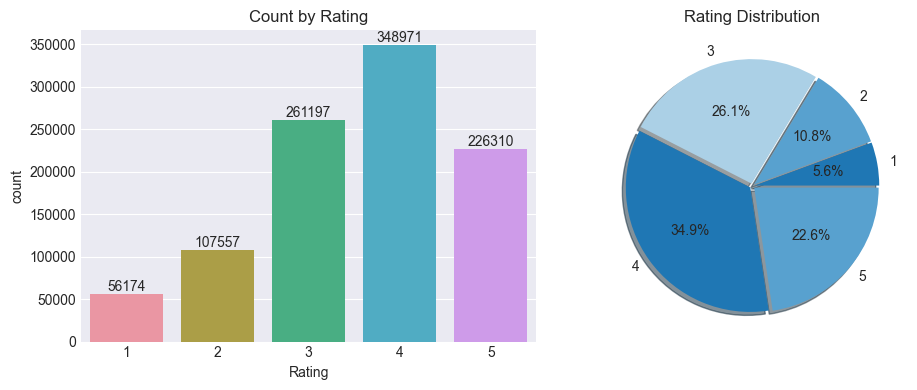

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# CountPlot
sns.countplot(data=ratings, x='Rating', ax=axes[0])
axes[0].set_title('Count by Rating')
axes[0].bar_label(axes[0].containers[0])

# Pie chart
rating_counts = ratings['Rating'].value_counts().sort_index()
axes[1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.02]*len(rating_counts))
axes[1].set_title('Rating Distribution')

plt.tight_layout()
plt.show()

1. Visualization

- **Bar Plot**
    - The count plot displays the total number of occurrences for each rating in the dataset. The x-axis represents rating values (e.g., 1 to 5), while the y-axis shows the count of how many times each rating was given.
    - Each bar represents the frequency of a specific rating. The title, **"Count by Rating"**, indicates that this is a direct numerical comparison. The `bar_label()` function annotates each bar with its respective count, making it easy to see exact values.
    - Shows the raw distribution of ratings, showing which scores are more frequent and how users generally rate movies.

- **Pie Chart**
    - The pie chart represents the same rating distribution but in percentage form. Instead of raw counts, it shows the proportion that each rating occupies relative to the total dataset.
    - The chart uses `autopct='%1.1f%%'` to display percentages on each slice, ensuring clear readability of proportions. The slices are labeled with their respective rating values, and the `explode` parameter slightly separates all slices (by 0.02) to make them stand out.
    - This visualization helps determine the `relative` impact of each rating rather than just absolute counts. It quickly reveals whether users tend to rate movies positively (e.g., mostly 4s and 5s) or if lower ratings appear frequently.

These visualizations help validate assumptions about user rating behavior. If high ratings dominate, it might suggest positive sentiment overall; if lower ratings appear frequently, it could indicate critical reviews.





**4.2 Bivariate Analysis** ✔️

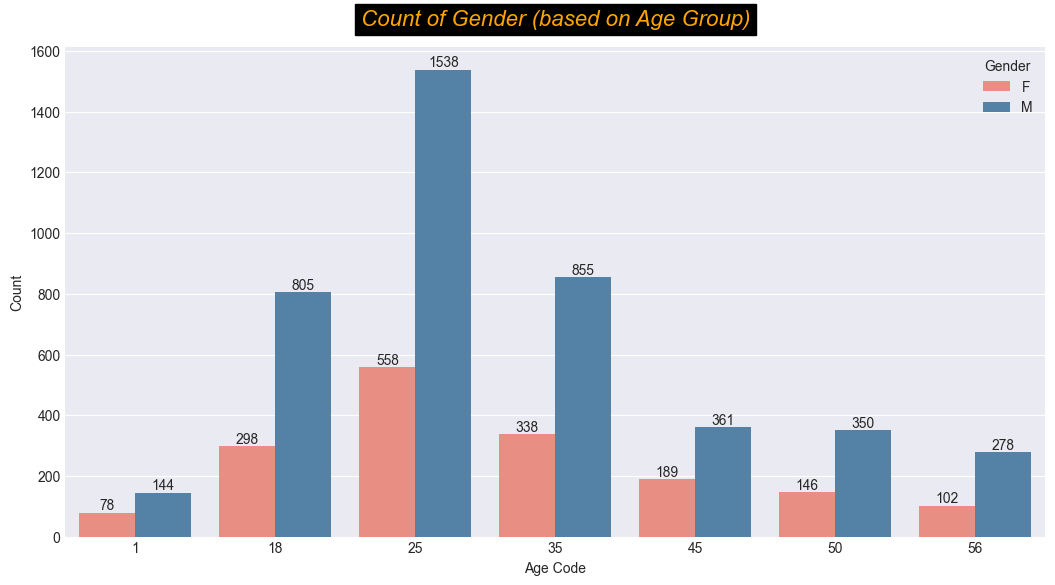

In [42]:
# Define font style
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

# Count of Gender grouped by Age with corrected palette
plt.figure(figsize=(10,5))
ax = sns.countplot(data=users, x='Age', hue='Gender', palette={'M': 'steelblue', 'F': 'salmon'})
for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Gender (based on Age Group)', fontdict=font, pad=15)
plt.xlabel('Age Code')
plt.ylabel('Count')
plt.show()

*explanation* ❎

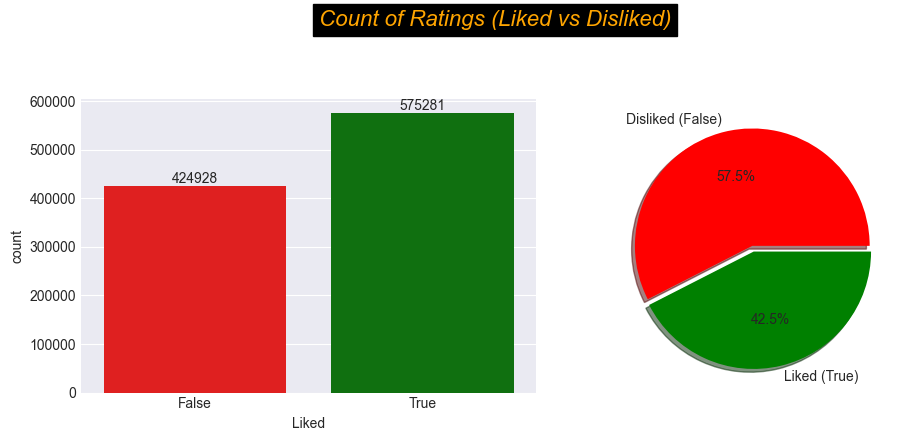

In [43]:
# Count of Liked Ratings
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Countplot
sns.countplot(data=ratings, x='Liked', ax=axes[0], palette={False: 'red', True: 'green'})
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie Chart
slices = ratings.Liked.value_counts().values
labels = ['Disliked (False)', 'Liked (True)']
axes[1].pie(slices, labels=labels, colors=['red', 'green'], shadow=True, explode=[0, 0.05], autopct='%1.1f%%')

plt.suptitle('Count of Ratings (Liked vs Disliked)', y=1.09, fontsize=16, fontstyle='italic',
             backgroundcolor='black', color='orange')
plt.tight_layout()
plt.show()

*explanation* ❎

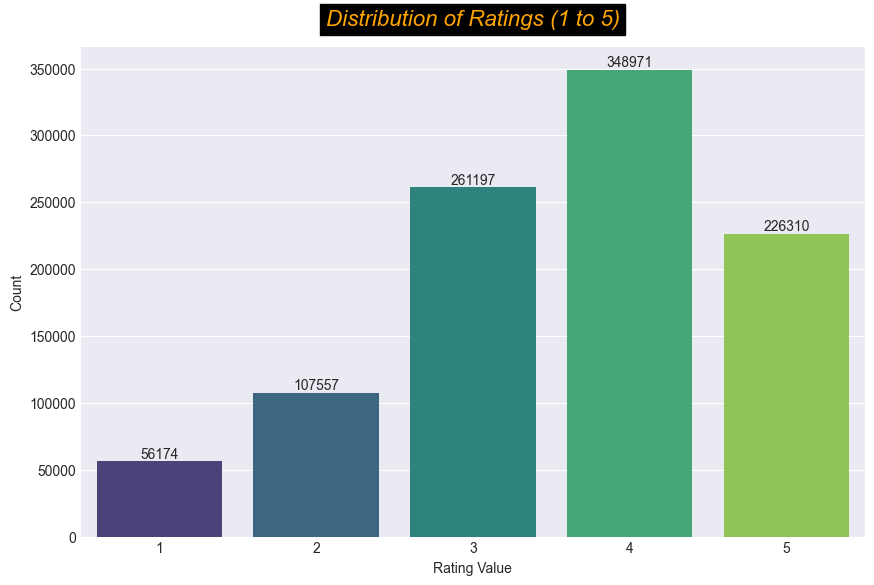

In [44]:
# Countplot of each rating (1–5)
plt.figure(figsize=(8,5))
ax = sns.countplot(data=ratings, x='Rating', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Ratings (1 to 5)', fontsize=16, fontstyle='italic', backgroundcolor='black', color='orange', pad=15)
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.show()

*explanation* ❎

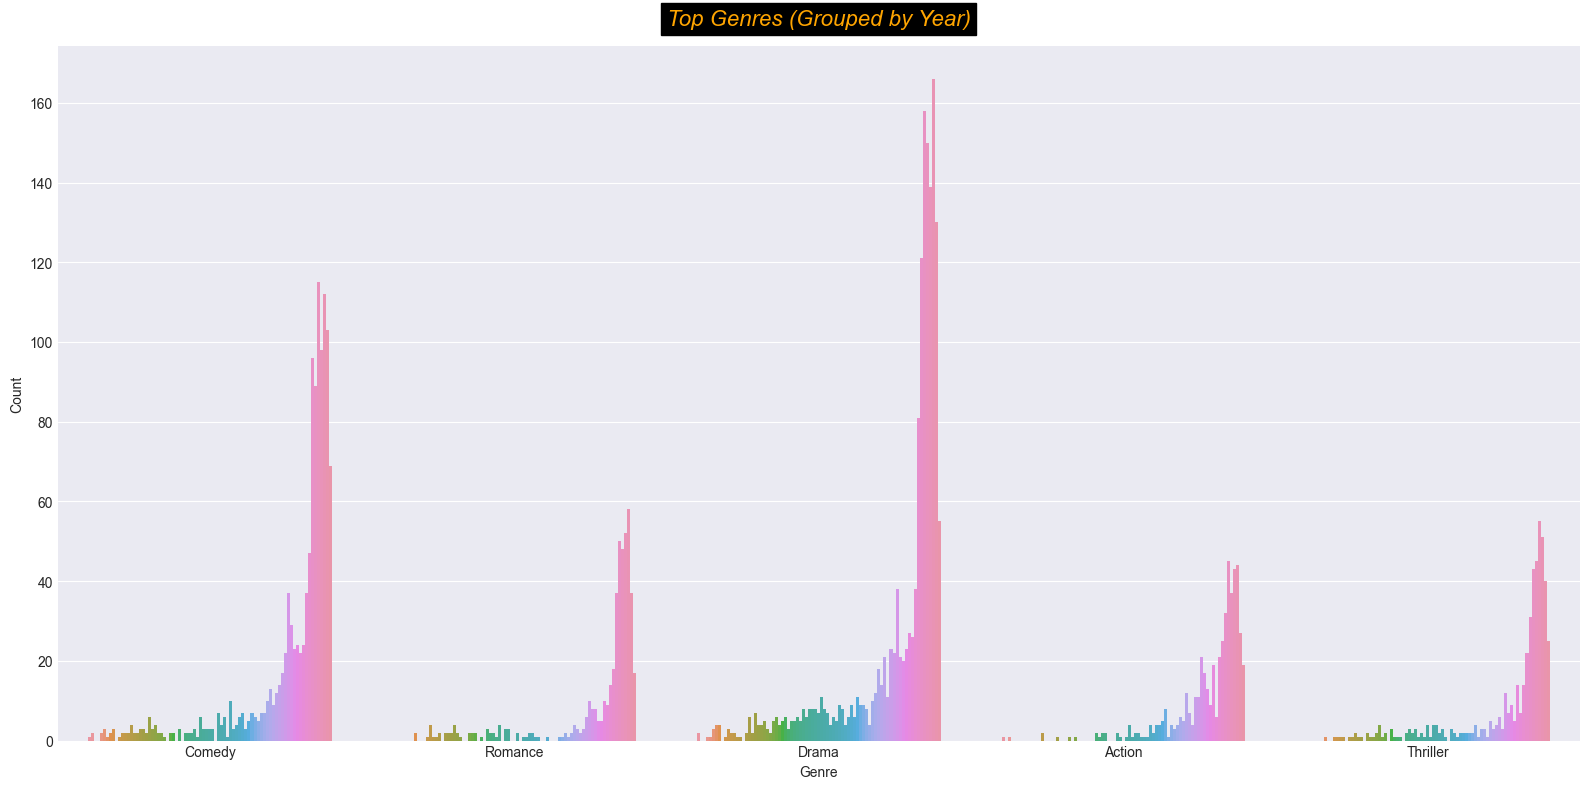

In [45]:
# Extract release year from Title (assumes format like "Movie Name (1999)")
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Flatten genres and keep Year
genre_exploded = movies[['Genres', 'Year']].copy()
genre_exploded['Genres'] = genre_exploded['Genres'].str.split('|')
genre_exploded = genre_exploded.explode('Genres')

# Keep only top 5 genres
top_genres = genre_exploded['Genres'].value_counts().nlargest(5).index
filtered = genre_exploded[genre_exploded['Genres'].isin(top_genres)]

# Convert year to integer and drop NaN
filtered = filtered.dropna(subset=['Year'])
filtered['Year'] = filtered['Year'].astype(int)

# Countplot with larger figure size
plt.figure(figsize=(16,8))  # Increase the figure size here
ax = sns.countplot(data=filtered, x='Genres', hue='Year')
plt.legend([],[], frameon=False)  # Too many years to label by default

# Title and labels
plt.title('Top Genres (Grouped by Year)', fontdict=font, pad=15)
plt.xlabel('Genre')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

*explanation* ❎

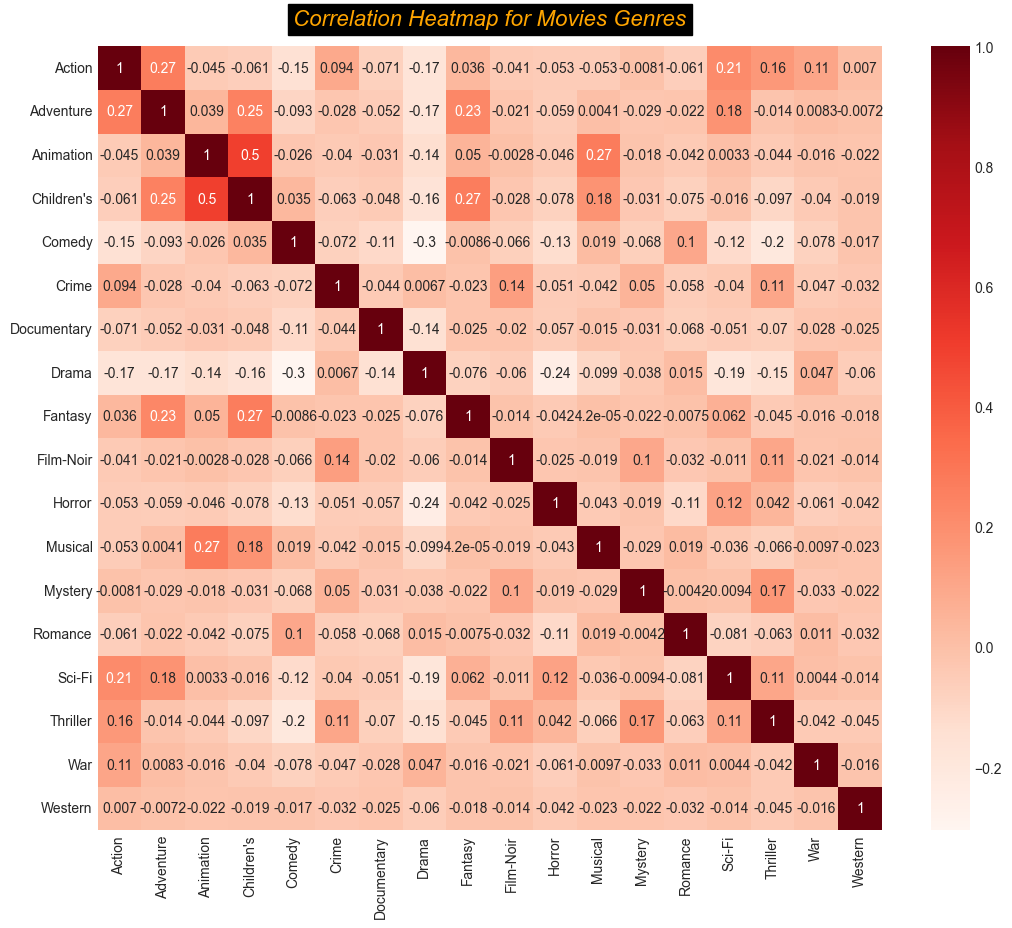

In [46]:
# First, encode categorical columns such as 'Genres' into numeric representation (one-hot encoding)
genre_dummies = movies['Genres'].str.get_dummies('|')

# Now, you can calculate correlation and plot the heatmap
corr_matrix = genre_dummies.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.title('Correlation Heatmap for Movies Genres', fontdict=font, pad=15)
plt.show()

*explanation* ❎

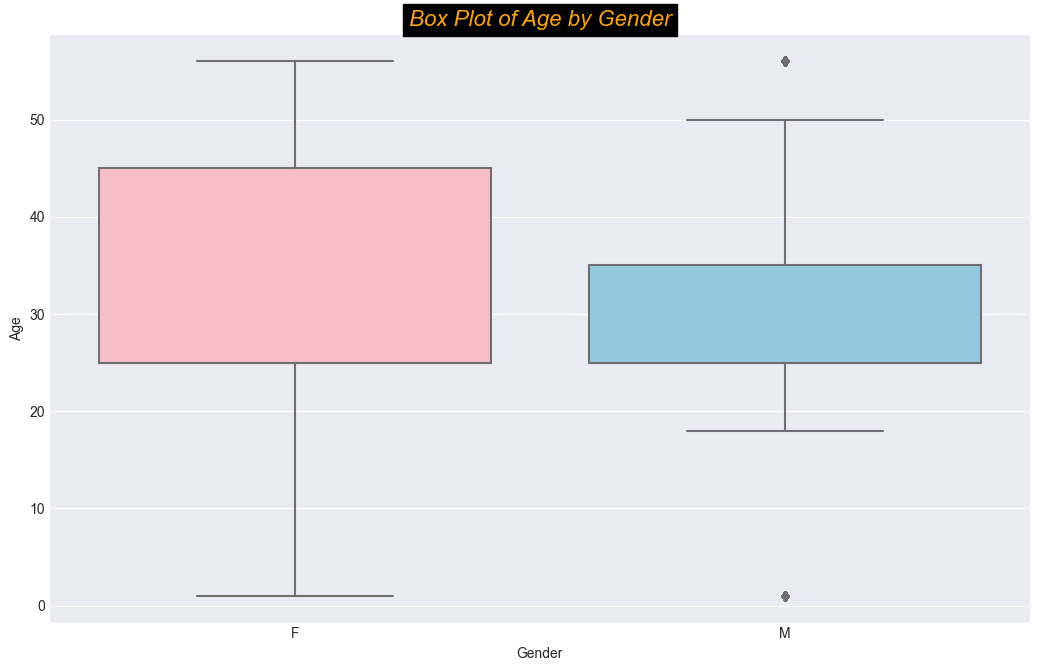

In [47]:
# Set custom color palette
custom_palette = {'M': 'skyblue', 'F': 'lightpink'}

# Create larger figure for better readability
plt.figure(figsize=(10, 6))
sns.boxplot(data=users, x='Gender', y='Age', palette=custom_palette)

# Add title with font styling
plt.title('Box Plot of Age by Gender', fontdict=font)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

*explanation* ❎

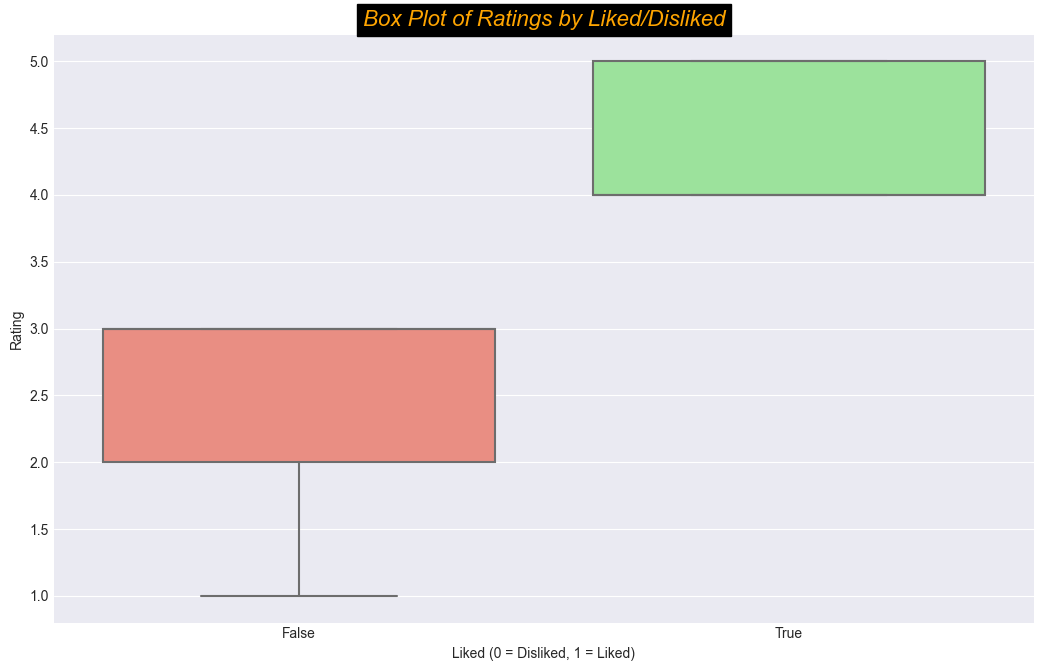

In [48]:
# Set custom color palette
custom_palette = {0: 'salmon', 1: 'lightgreen'}

# Create larger figure for clarity
plt.figure(figsize=(10, 6))
sns.boxplot(data=ratings, x='Liked', y='Rating', palette=custom_palette)

# Add title and axis labels
plt.title('Box Plot of Ratings by Liked/Disliked', fontdict=font)
plt.xlabel('Liked (0 = Disliked, 1 = Liked)')
plt.ylabel('Rating')
plt.show()

*explanation* ❎

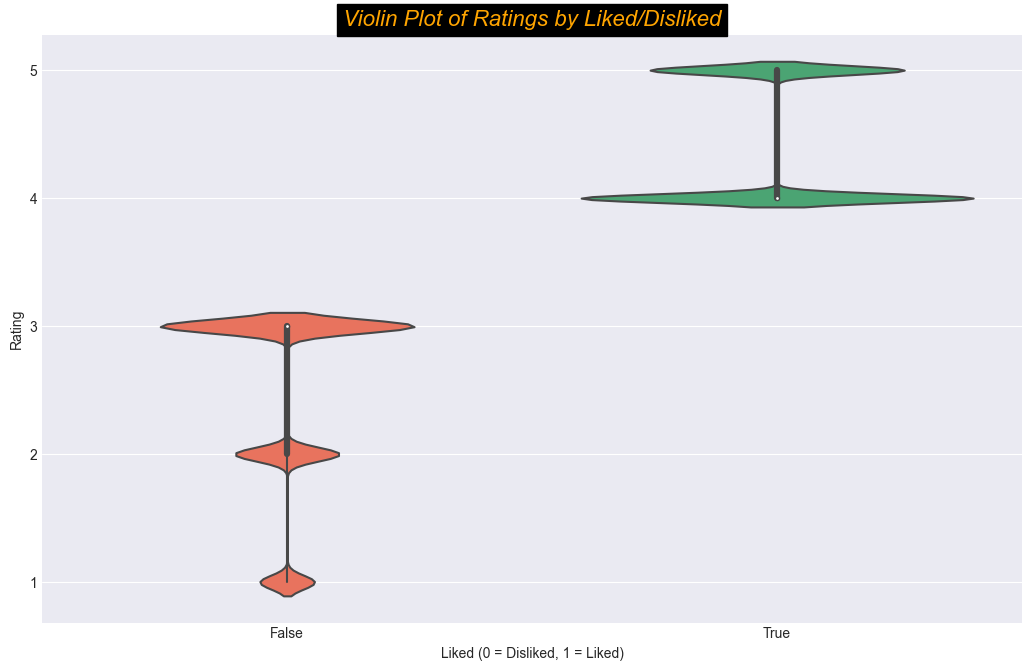

In [49]:
# Violin plot: Rating by Liked
plt.figure(figsize=(10, 6))
sns.violinplot(data=ratings, x='Liked', y='Rating', palette={0: 'tomato', 1: 'mediumseagreen'})
plt.title('Violin Plot of Ratings by Liked/Disliked', fontdict=font)
plt.xlabel('Liked (0 = Disliked, 1 = Liked)')
plt.ylabel('Rating')
plt.show()

*explanation* ❎

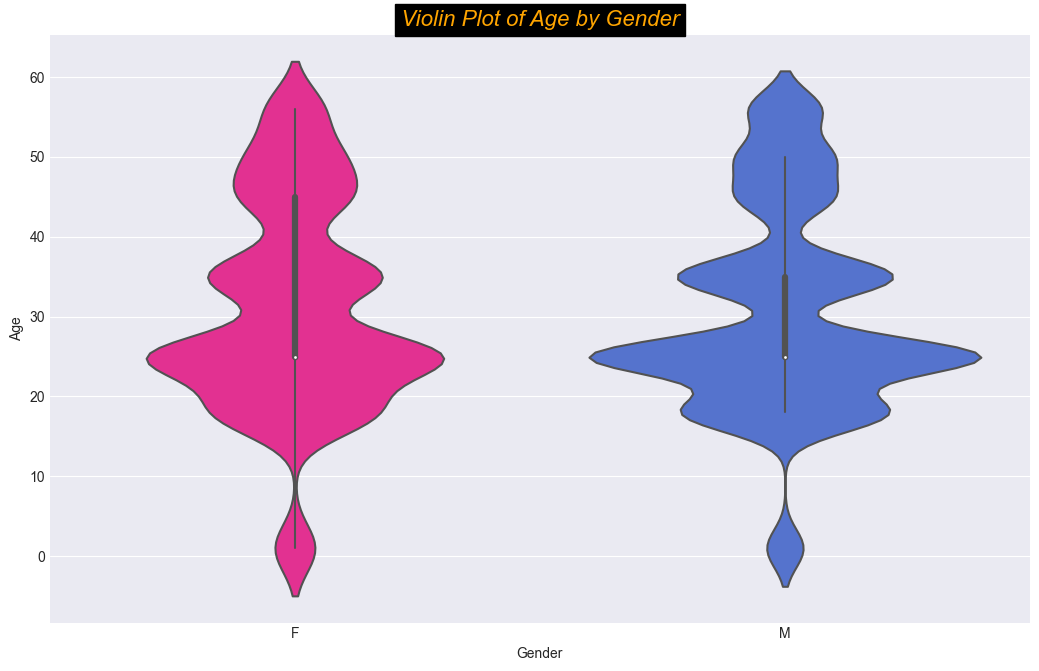

In [50]:
# Violin plot: Age by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=users, x='Gender', y='Age', palette={'M': 'royalblue', 'F': 'deeppink'})
plt.title('Violin Plot of Age by Gender', fontdict=font)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

*explanation* ❎

**4.3 Multivariate Analysis**

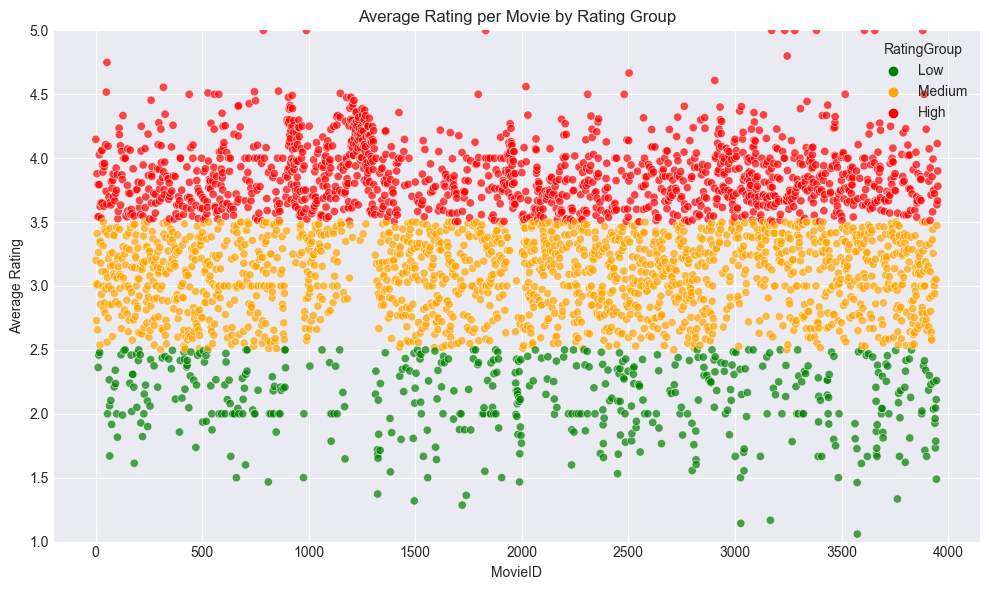

In [51]:
# First, compute the average rating per movie and count of ratings
movie_avg = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_avg.columns = ['MovieID', 'Rating', 'RatingCount']  # Rename for clarity

# Bin ratings into groups
movie_avg['RatingGroup'] = pd.cut(movie_avg['Rating'], bins=[1, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=movie_avg,
    x='MovieID',
    y='Rating',
    hue='RatingGroup',
    palette={'Low': 'green', 'Medium': 'orange', 'High': 'red'},
    alpha=0.7
)
plt.title('Average Rating per Movie by Rating Group')
plt.xlabel('MovieID')
plt.ylabel('Average Rating')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

In [52]:
# Recreate movie_avg with both average rating and count
movie_avg = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_avg.rename(columns={'mean': 'Rating', 'count': 'NumRatings'}, inplace=True)

# Create rating group
movie_avg['RatingGroup'] = pd.cut(movie_avg['Rating'], bins=[1, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])


In [53]:
fig = px.scatter_3d(
    data_frame=movie_avg,
    x='MovieID',
    y='NumRatings',       
    z='Rating',
    color='RatingGroup',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3D Scatter: MovieID vs Number of Ratings vs Average Rating'
)
pio.show(fig)

In [54]:
# Pivot table: mean Age by Occupation and Gender
user_pivot = pd.pivot_table(data=users, index='Occupation', columns='Gender', values='Age', aggfunc='mean')
user_pivot.style.background_gradient(cmap='coolwarm')


Gender,F,M
Occupation,,
0,30.788793,29.405010
1,35.387560,36.451411
2,33.681319,29.102273
3,33.640000,32.424658
4,20.978632,20.154286
5,30.967742,28.950617
6,37.343137,36.485075
7,33.410072,35.172222
8,47.000000,31.857143


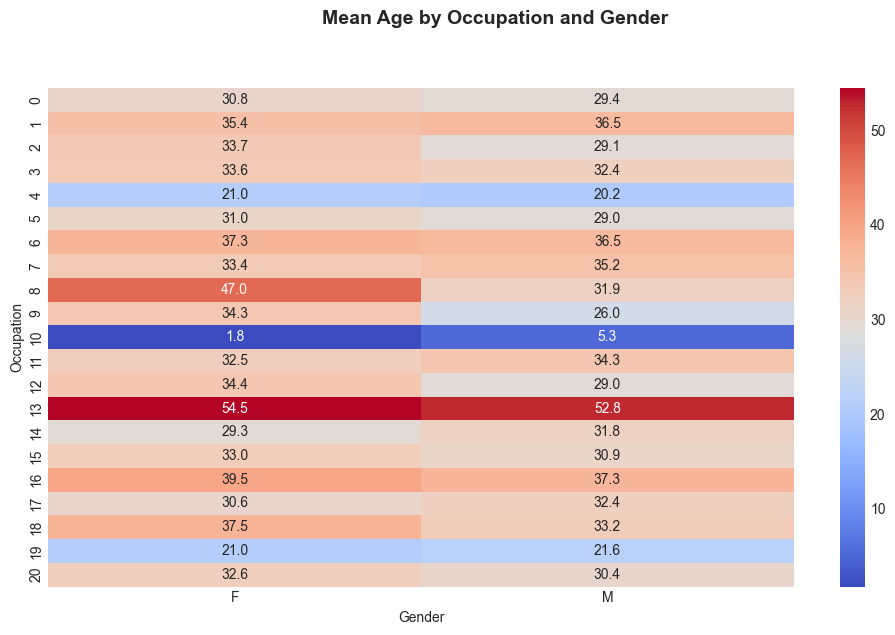

In [55]:
# Pivot table: mean Age by Occupation and Gender
user_pivot = pd.pivot_table(data=users, index='Occupation', columns='Gender', values='Age', aggfunc='mean')

# Optional: define font for suptitle
font = {'fontsize': 14, 'fontweight': 'bold'}

# Show result in heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(user_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.suptitle('Mean Age by Occupation and Gender', y=1.05, x=0.5, **font)
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

*explanation* ❎